# Credit Card Fraud Detection - Data Overview and EDA

In this section, we conduct a Data Overview and Exploratory Data Analysis (EDA) of the dataset to gain understanding of the fraudulent and non-fraudulent transactions. By examining feature distributions, class balance, and potential outliers, the goal is to identify patterns that can help with predictive modelling.

In [24]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# doad data
df = pd.read_csv('../data/raw/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## 1. Data Overview

In [6]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
# display summary statistics
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
# class distribution
print("Class distribution:")
print(df['Class'].value_counts(normalize=True))

Class distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [25]:
# Check for duplicates in the DataFrame
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [27]:
# missing values
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 2. Exploratory Data Analysis

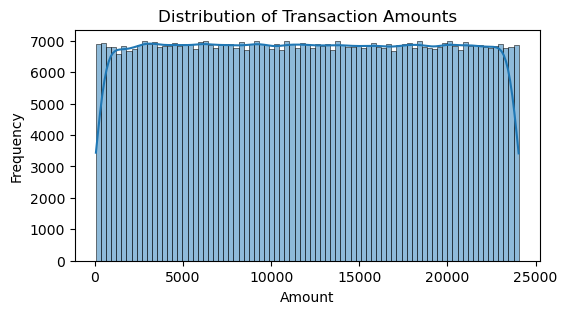

In [14]:
# plot distribution of transaction amounts
plt.figure(figsize=(6, 3))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

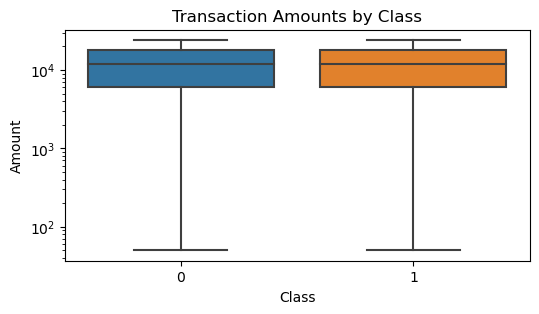

Amount statistics by class:
                mean    median    min       max
Class                                         
0      12026.313506  11996.90  50.12  24039.93
1      12057.601763  12062.45  50.01  24039.93


In [15]:
# comparing amount distributions for fraud and non-fraud transactions
plt.figure(figsize=(6, 3))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Class')
plt.yscale('log')
plt.show()

amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'median', 'min', 'max'])
print("Amount statistics by class:\n", amount_stats)

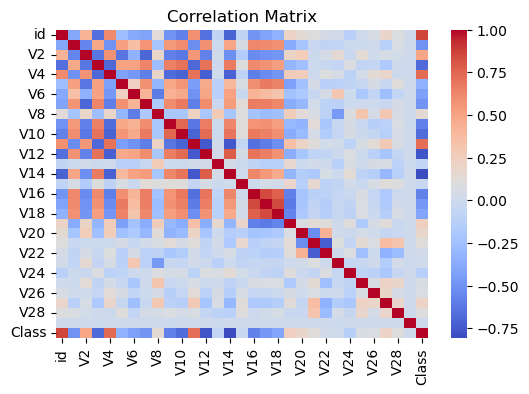

In [17]:
# correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# calculate and print statistics
amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'median', 'min', 'max'])
print("Amount statistics by class:\n", amount_stats)

Amount statistics by class:
                mean    median    min       max
Class                                         
0      12026.313506  11996.90  50.12  24039.93
1      12057.601763  12062.45  50.01  24039.93


Number of outliers in Amount: 0


C:\Users\Ondrej\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


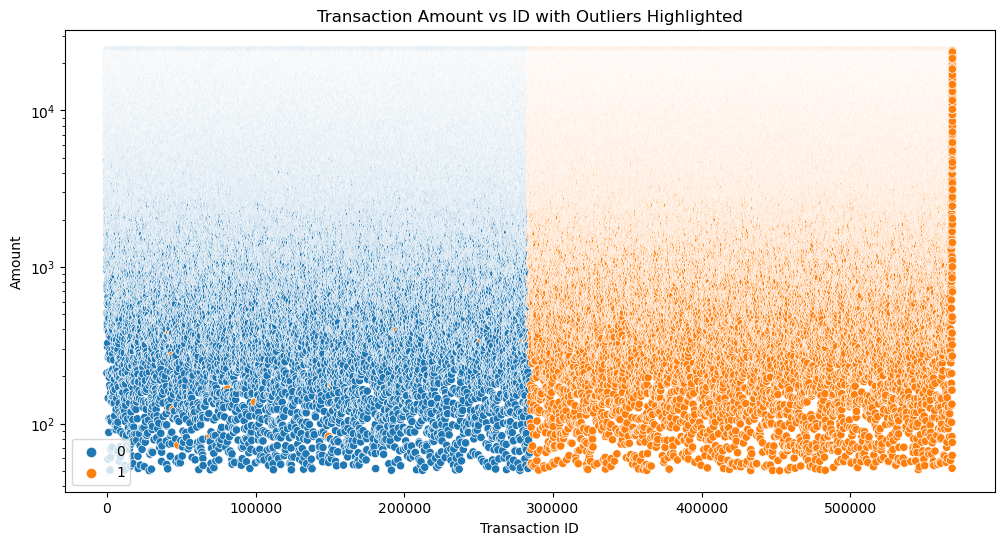

In [21]:
# detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# outliers in Amount
amount_outliers = detect_outliers(df, 'Amount')
print(f"Number of outliers in Amount: {len(amount_outliers)}")

# visualize outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='id', y='Amount', hue='Class', data=df)
sns.scatterplot(x='id', y='Amount', data=amount_outliers, color='red', s=100, label='Outliers')
plt.title('Transaction Amount vs ID with Outliers Highlighted')
plt.xlabel('Transaction ID')
plt.ylabel('Amount')
plt.yscale('log')
plt.legend()
plt.show()

# Key Observations

- The perfect 50-50 split between fraudulent and non-fraudulent transactions indicates no need to address class imbalance. 
- The lack of difference in amount distributions between classes suggests that transaction amount alone is not a good predictor of fraud.
- No outliers identified, no empty values and all features are standardized using PCA, except for "Amount".
- Next step, hence, standardize the ranges of amount to improve the model performance in fraud detection, while ensuring the integrity of critical transaction information.








# Data Preprocessing

In [31]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
ss1 = RobustScaler()
# Scale the 'Amount' feature
df['Amount'] = ss1.fit_transform(df['Amount'].values.reshape(-1, 1))

df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.496764,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.458942,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-0.794279,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.554667,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.187692,0


In [37]:
df.to_parquet("../data/processed/creditcard_2023_processed.parquet")